# Importing required libraries as well as doing baseline exploratory data analysis:

In [3]:
import pandas as pd #import Pandas
import numpy as np # import NumPy
import matplotlib.pyplot as plt # import Matplotlib
from collections import defaultdict #import defaultdict

In [4]:
df = pd.read_csv('countryVaccinations.csv', float_precision='round_trip') # creates dataframe with the .csv file
pd.set_option("precision", 20) # prevents Pandas from rounding the decimals

In [6]:
df.dtypes #Looking at the datatypes of every column in the overall dataset

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [7]:
df.loc[df.country == 'United States', 'people_vaccinated_per_hundred'] # observiog the percent of people vaccinated 
# in the United States over 245 days

37339     0.17000000000000001221
37340     0.17999999999999999334
37341                        NaN
37342     0.29999999999999998890
37343                        NaN
                  ...           
37579    59.47999999999999687361
37580    59.60000000000000142109
37581    59.77000000000000312639
37582    59.92999999999999971578
37583    60.07999999999999829470
Name: people_vaccinated_per_hundred, Length: 245, dtype: float64

In [8]:
df.columns # getting a better understanding of the columns in the dataset that I can possibly index in the future

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [9]:
df.drop(columns = ['iso_code', 'source_name', 'source_website', 'daily_vaccinations_raw', 'total_vaccinations_per_hundred'], inplace = True)
# removing columns that are irrelevant to me for the purpose of this project

In [10]:
df.info()
# getting a better understanding of null values in the dataset
# it appears that columns that require data that aren't repeating (date) or set (country name) are missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39113 entries, 0 to 39112
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              39113 non-null  object 
 1   date                                 39113 non-null  object 
 2   total_vaccinations                   21551 non-null  float64
 3   people_vaccinated                    20604 non-null  float64
 4   people_fully_vaccinated              17728 non-null  float64
 5   daily_vaccinations                   38855 non-null  float64
 6   people_vaccinated_per_hundred        20604 non-null  float64
 7   people_fully_vaccinated_per_hundred  17728 non-null  float64
 8   daily_vaccinations_per_million       38855 non-null  float64
 9   vaccines                             39113 non-null  object 
dtypes: float64(7), object(3)
memory usage: 3.0+ MB


In [11]:
df.describe()
# statistical analysis of the numerical columns in the dataset
# Overall, it appears that vaccination, globally, is not progressing at a substantial rate.
# As we saw in line 14, the United States's percent of people vaccinated far exceeds the mean of people vaccinated. 
# Relatively, the United States is a much larger country than most other countries and, if it has a higher PERCENT of
# people vaccinated, then it has been able to administer more vaccines than most other countries. 
# This could possibly be due to the effect that COVID-19 has had on the United States or the prominence of the United
# States in the world. 

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.15510000000000000000e+04,2.06040000000000000000e+04,1.77280000000000000000e+04,3.88550000000000000000e+04,20604.00000000000000000000,17728.00000000000000000000,38855.00000000000000000000
mean,1.66447390159621369094e+07,7.25220954353523626924e+06,4.42408981407942250371e+06,1.26415309355295335990e+05,23.40389536012425963918,16.54879061371852344564,3577.04861665165344675188
std,9.52698823086299598217e+07,2.62149918222410306334e+07,1.57863939189877174795e+07,8.83964124242976889946e+05,23.08545965003144573302,19.34090419270255623019,4603.15343748526356648654
min,0.00000000000000000000e+00,0.00000000000000000000e+00,1.00000000000000000000e+00,0.00000000000000000000e+00,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
25%,1.67758000000000000000e+05,1.39326500000000000000e+05,6.38700000000000000000e+04,8.52000000000000000000e+02,3.39749999999999996447,1.85000000000000008882,475.00000000000000000000
50%,1.17462400000000000000e+06,8.38499500000000000000e+05,4.94110500000000000000e+05,6.87400000000000000000e+03,14.71000000000000085265,8.14000000000000056843,2112.00000000000000000000
75%,6.15147150000000000000e+06,3.94887350000000000000e+06,2.46278375000000000000e+06,3.92820000000000000000e+04,40.25249999999999772626,25.58249999999999957367,5350.50000000000000000000
max,1.93586900000000000000e+09,6.22000000000000000000e+08,7.77046000000000000000e+08,2.24242860000000000000e+07,116.93000000000000682121,116.26999999999999602096,118759.00000000000000000000


In [12]:
df_cat = df[['country', 'date', 'vaccines']] 
# seperating the categorical variables in the dataset into a singular dataset

In [13]:
df_num = df[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']]
# seperating the numerical variables in the dataset into a singular dataset

In [14]:
df_cat 
# observing the categorical dataset that was just created

,country,date,vaccines
0,Afghanistan,2021-02-22,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...
39108,Zimbabwe,2021-08-17,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39109,Zimbabwe,2021-08-18,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39110,Zimbabwe,2021-08-19,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39111,Zimbabwe,2021-08-20,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [15]:
df_num
# observing the numerical dataset that was just created

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.0,0.0,NaN,NaN,0.00000000000000000000,NaN,NaN
1,NaN,NaN,NaN,1367.0,NaN,NaN,35.0
2,NaN,NaN,NaN,1367.0,NaN,NaN,35.0
3,NaN,NaN,NaN,1367.0,NaN,NaN,35.0
4,NaN,NaN,NaN,1367.0,NaN,NaN,35.0
...,...,...,...,...,...,...,...
39108,3450959.0,2145237.0,1305722.0,68200.0,14.42999999999999971578,8.78999999999999914735,4589.0
39109,3542340.0,2193046.0,1349294.0,75000.0,14.75999999999999978684,9.08000000000000007105,5046.0
39110,3620937.0,2233265.0,1387672.0,61097.0,15.02999999999999936051,9.33999999999999985789,4111.0
39111,3699508.0,2271429.0,1428079.0,69346.0,15.27999999999999936051,9.60999999999999943157,4666.0


In [16]:
df_num.info()
# looking at the number of null values and datatypes of each column in the numerical dataset (all of them appear 
# to have null values). This reinforces what I observed previously. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39113 entries, 0 to 39112
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   total_vaccinations                   21551 non-null  float64
 1   people_vaccinated                    20604 non-null  float64
 2   people_fully_vaccinated              17728 non-null  float64
 3   daily_vaccinations                   38855 non-null  float64
 4   people_vaccinated_per_hundred        20604 non-null  float64
 5   people_fully_vaccinated_per_hundred  17728 non-null  float64
 6   daily_vaccinations_per_million       38855 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


In [17]:
df_cat.info()
# looking at the number of null values and datatypes of each column in the categorical dataset (none of them appear 
# to have null values). This reinforces what I observed previously. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39113 entries, 0 to 39112
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   39113 non-null  object
 1   date      39113 non-null  object
 2   vaccines  39113 non-null  object
dtypes: object(3)
memory usage: 916.8+ KB


In [18]:
df.loc[df.country == 'United States', 'people_vaccinated_per_hundred']
# Once again, I am observing the percent of people vaccinated over 245 days in the United States as I want to see
# how many null values there are. 

37339     0.17000000000000001221
37340     0.17999999999999999334
37341                        NaN
37342     0.29999999999999998890
37343                        NaN
                  ...           
37579    59.47999999999999687361
37580    59.60000000000000142109
37581    59.77000000000000312639
37582    59.92999999999999971578
37583    60.07999999999999829470
Name: people_vaccinated_per_hundred, Length: 245, dtype: float64

In [19]:
df.fillna(value = 0, inplace = True) # Filling the null values in the overall dataset with '0'
df.total_vaccinations = df.total_vaccinations.astype(int) # Setting the datatype of the data under 'total_vaccinations' 
# to the integer datatype
df.people_vaccinated = df.people_vaccinated.astype(int) # Setting the datatype of the data under 'people_vaccinated' 
# to the integer datatype
df.people_fully_vaccinated = df.people_fully_vaccinated.astype(int) # Setting the datatype of the data under 
# 'total_vaccinations' to the integer datatype


df.daily_vaccinations = df.daily_vaccinations.astype(int) # Setting the datatype of the data under 'daily_vaccinations' 
# to the integer datatype


df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.astype(int) # Setting the datatype 
# of the data under 'people_fully_vaccinated' to the integer datatype
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.astype(int) # Setting the datatype of the data 
# under 'daily_vaccinations_per_million' to the integer datatype
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.astype(float) # Setting the datatype of the data 
# under 'people_vaccinated_per_hundred' to the float datatype

In [20]:
df.loc[df.country == 'United States', 'people_vaccinated_per_hundred']
# Checking to make sure that the null values were converted to zero

37339     0.17000000000000001221
37340     0.17999999999999999334
37341     0.00000000000000000000
37342     0.29999999999999998890
37343     0.00000000000000000000
                  ...           
37579    59.47999999999999687361
37580    59.60000000000000142109
37581    59.77000000000000312639
37582    59.92999999999999971578
37583    60.07999999999999829470
Name: people_vaccinated_per_hundred, Length: 245, dtype: float64

<AxesSubplot:xlabel='date'>

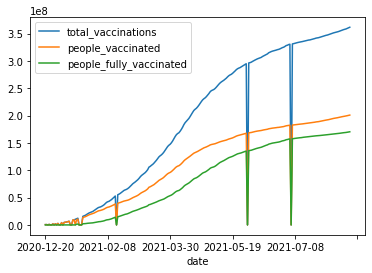

In [21]:
df.loc[df.country == 'United States', ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'date']].plot(x = 'date')
# Using Matplotlib to plot the relationship between date and total vaccinations, people vaccinated, and people fully vaccinated 

In [22]:
df.loc[df.country == 'United States', 'total_vaccinations']
# Looking at the total number of cumulative vaccinations for the United States over a 245-day period

37339       556208
37340       614117
37341            0
37342      1008025
37343            0
           ...    
37579    357894995
37580    358599835
37581    359623380
37582    360634287
37583    361684564
Name: total_vaccinations, Length: 245, dtype: int64

In [23]:
df # looking at the overall dataset once again to make sure that the column of
# "people_vaccinated_per_hundred" has float values

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0,0,0,0,0.00000000000000000000,0,0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...,...
39108,Zimbabwe,2021-08-17,3450959,2145237,1305722,68200,14.42999999999999971578,8,4589,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39109,Zimbabwe,2021-08-18,3542340,2193046,1349294,75000,14.75999999999999978684,9,5046,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39110,Zimbabwe,2021-08-19,3620937,2233265,1387672,61097,15.02999999999999936051,9,4111,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39111,Zimbabwe,2021-08-20,3699508,2271429,1428079,69346,15.27999999999999936051,9,4666,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [24]:
len(df.country.unique()) # finding the number of unique countries there are in the dataset

222

In [25]:
len(df) # finding the number of rows in the dateset

39113

In [26]:
df.daily_vaccinations[1] # quickly indexing the dataframe to see second entry in the 'daily vaccinations column'

1367

# Which countries have the highest number of vaccinated people? 

In [27]:
total_vaccinated = {} # initializing the dictionary

for country in df.country.unique() : # using a for loop to pick out the individual countries and assign the number of
    vaccinated = 0 # vaccinated people to zero

    for i in range(len(df)) : # looping through all the rows in the overall dataset
        if df.country[i] == country : # going through all the rows and picking the rows that have a 'country' value equivalent to the country of interest at that time
            vaccinated += df.daily_vaccinations[i] # adding the value of 'daily_vaccinations' in the rows that were chosen to the overall value of vaccinated for that particular country
    
    total_vaccinated[country] = vaccinated # creating dictionary values in total_vaccinated where the country is the key and the vaccinated number is the value
    
    total_vaccinated_df = pd.DataFrame.from_dict(total_vaccinated, # convering the dictionary we created to a dataframe 
                                                         orient='index',
                                                         columns = ['total_vaccinated_till_date']) 

total_vaccinated_df.sort_values(by = 'total_vaccinated_till_date', ascending = False, inplace = True) # sorting the values in the dataframe in descending order (greatest to least)

total_vaccinated_df # looking at the overall dataframe that was just created

,total_vaccinated_till_date
China,1898830643
India,562265410
United States,358727323
Brazil,167579290
Japan,111835489
...,...
Tuvalu,1860
Tokelau,1045
Pitcairn,38
Bonaire Sint Eustatius and Saba,0


In [29]:
# We can see that China, India, and the United States have the highest number of vaccinated people till date. 
# Let us take a look at how the number of daily vaccinations differ between each of these countries: 

Text(0, 0.5, 'daily vaccination count (millions)')

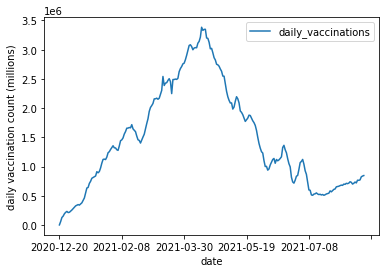

In [36]:
df.loc[df.country == 'United States', ['daily_vaccinations', 'date']].plot(x = 'date') # plotting date vs. daily vaccinations for the United States
plt.ylabel('daily vaccination count (millions)') # defining the y-axis 

Text(0, 0.5, 'daily vaccination count (tens of millions)')

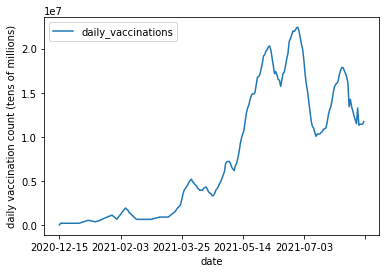

In [37]:
df.loc[df.country == 'China', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations') # plotting date vs. daily vaccinations for China
plt.ylabel('daily vaccination count (tens of millions)') # defining the y-axis 

Text(0, 0.5, 'daily vaccination count (millions)')

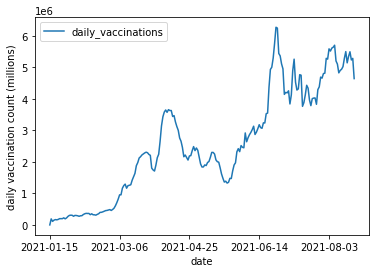

In [38]:
df.loc[df.country == 'India', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations') # plotting date vs. daily vaccinations for India
plt.ylabel('daily vaccination count (millions)') # defining the y-axis 

In [ ]:
# We can see that China has drastically increased the number of vaccinations in their country as they have daily 
# vaccination rates that exceed India and the United States by approximately 10-15 million. 
# India comes second as they have daily vaccination rates of approximately 3 million. However, India recently received
# an influx of vaccines and this might be a reason wby they trail behind China in their number of daily vaccinations. 
# Lastly, the United States has a daily vaccination rate of approximately 2 million. It appears that the United States 
# had a singular increase in daily vaccinations when the vaccine was released to everyone, which then fell after vaccien
# after approximately 30-40 percent of the population received the vaccine. 

Text(0, 0.5, 'daily vaccinations count (tens of millions)')

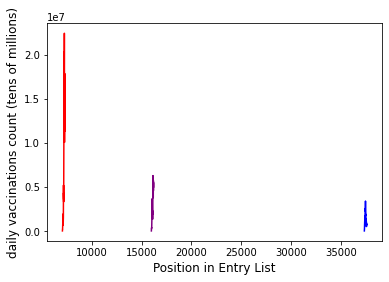

In [39]:
India = df.loc[df.country == 'India', ['daily_vaccinations']] # Setting the number of daily_vaccinations per day to a variable named 'India'
China = df.loc[df.country == 'China', ['daily_vaccinations']] # Setting the number of daily_vaccinations per day to a variable named 'China'
US = df.loc[df.country == 'United States', ['daily_vaccinations']] # Setting the number of daily_vaccinations per day to a variable named 'US'
plt.plot(India, color = 'purple') # Plotting the number of daily vaccinations for India (purple-colored) using Matplotlib
plt.plot(China, color = 'red') # Plotting the number of daily vaccinations for China (purple-colored) using Matplotlib
plt.plot(US, color = 'blue') # Plotting the number of daily vaccinations for the U.S. (purple-colored) using Matplotlib
plt.xlabel("Position in Entry List", fontsize=12) # setting the x-axis to 'Position in Entry List' with a font size of 12
plt.ylabel("daily vaccinations count (tens of millions)", fontsize=12) # setting the y-axis to 'daily vaccinations count (tens of millions)' with a font size of 12

# What country has the highest percentage of vaccinated people?

In [41]:
df.loc[df.country == 'United States', 'people_vaccinated_per_hundred'] # Observing the percent of people vaccinated
# in the United States before doing analysis on the percent of people vaccinated in each country

37339     0.17000000000000001221
37340     0.17999999999999999334
37341     0.00000000000000000000
37342     0.29999999999999998890
37343     0.00000000000000000000
                  ...           
37579    59.47999999999999687361
37580    59.60000000000000142109
37581    59.77000000000000312639
37582    59.92999999999999971578
37583    60.07999999999999829470
Name: people_vaccinated_per_hundred, Length: 245, dtype: float64

In [127]:
percent = {} # initializing a dictionary

for country in df.country.unique() : # creating a for loop that gathers each individual country
    percentage = 0.00 # setting the percentage to 0 (set to change as time goes on)

    for i in df.loc[df.country == country, 'people_vaccinated_per_hundred'] : # creating a for loop that iterates through the percent of people vaccinated in the country 
        percentage_maybe = i # objectifying the percent of people vaccinated in the country
        if i > percentage: # setting the percentage to i if it is larger than the previous percentage (as the data is cumulative)
            percentage = i


    
    percent[country] = percentage # creating values in the 'percent' dictionary where the key is the country and the value is the percentage

    percent_vaccinated_df = pd.DataFrame.from_dict(percent,
                                                         orient='index',
                                                         columns = ['percent_vaccinated'])
#     converted dict to df 
percent_vaccinated_df.sort_values(by = 'percent_vaccinated', ascending = False, inplace = True) # sorting the values in the dataframe in descending order (greatest to least)

percent_vaccinated_df # viewing the dataframe

,percent_vaccinated
Gibraltar,116.93000000000000682121
Pitcairn,100.00000000000000000000
Malta,93.00000000000000000000
United Arab Emirates,84.20000000000000284217
Iceland,80.64000000000000056843
...,...
Tanzania,0.36999999999999999556
Burkina Faso,0.26000000000000000888
Chad,0.20000000000000001110
Haiti,0.20000000000000001110


Text(0, 0.5, 'Daily vaccinations (in hundreds)')

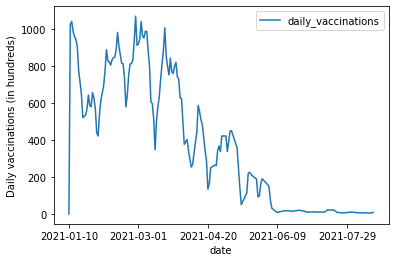

In [43]:
df.loc[df.country == 'Gibraltar', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations') # gathering the number of daily vaccinations and the respective date as well as plotting it 
plt.xlabel('date') # setting the x-axis label to 'date'
plt.ylabel('Daily vaccinations (in hundreds)') # setting the y-axis label to 'Daily vaccinations (in hundreds)'

Text(0, 0.5, 'Daily vaccinations ')

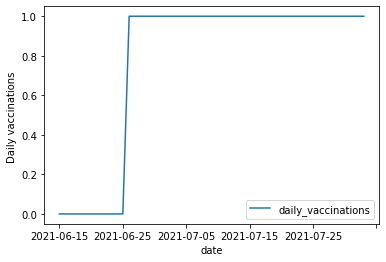

In [44]:
df.loc[df.country == 'Pitcairn', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations') # gathering the number of daily vaccinations and the respective date as well as plotting it 
plt.xlabel('date') # setting the x-axis label to 'date'
plt.ylabel('Daily vaccinations (in ones) ') # setting the y-axis label to 'Daily vaccinations (in ones)'

Text(0, 0.5, 'Daily vaccinations ')

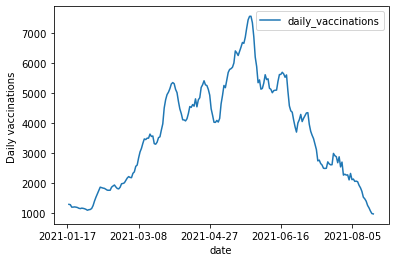

In [5]:
df.loc[df.country == 'Malta', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations') # gathering the number of daily vaccinations and the respective date as well as plotting it 
plt.xlabel('date') # setting the x-axis label to 'date'
plt.ylabel('Daily vaccinations (in thousands) ') # setting the y-axis label to 'Daily vaccinations (in thousands) '

# What vaccines are generally used in which countries?

In [45]:
df_cat # observing the columns that contain categorical data before doing analysis on frequently used vaccines in various countries

,country,date,vaccines
0,Afghanistan,2021-02-22,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...
39108,Zimbabwe,2021-08-17,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39109,Zimbabwe,2021-08-18,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39110,Zimbabwe,2021-08-19,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39111,Zimbabwe,2021-08-20,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [54]:
df_vaccines = pd.read_csv('country_vaccinations_by_manufacturer.csv') # importing the CSV file 'country_vaccinations_by_manufacturer.csv' to a Pandas dataframe
df_vaccines # observing the newly-created dataframe

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31096
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
12472,Uruguay,2021-08-20,Pfizer/BioNTech,1777237
12473,Uruguay,2021-08-20,Sinovac,3242561
12474,Uruguay,2021-08-21,Oxford/AstraZeneca,86548
12475,Uruguay,2021-08-21,Pfizer/BioNTech,1779916


In [84]:
df_vaccines.loc[df_vaccines.location == 'United States', 'vaccine']

11354            Moderna
11355    Pfizer/BioNTech
11356            Moderna
11357    Pfizer/BioNTech
11358            Moderna
              ...       
11944            Moderna
11945    Pfizer/BioNTech
11946    Johnson&Johnson
11947            Moderna
11948    Pfizer/BioNTech
Name: vaccine, Length: 595, dtype: object

In [1]:
new_dict = {}
vaccines = []
countries = []
temp = []
temp_2 = []
flatList = []

for vaccine in df_vaccines.vaccine.unique(): 
    list.append(i)
    
for country in df_vaccines.location.unique() : 
    countries.append(country)

for i in countries: 
    for c in df_vaccines.loc[df_vaccines.location == i, 'vaccine']:
        temp.append([i, c])
           
for i in temp:
    if i not in temp_2:
        temp_2.append(i)


NameError: name 'df_vaccines' is not defined

In [ ]:
new_df.loc[:, :].plot()